Author: Carlos Roberto de Melo

Date: 12/12/2020

Obj: Rotate grid with pPXF data. The goal is align the x-axis with the major axis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from plotbin.sauron_colormap import register_sauron_colormap
from plotbin.plot_velfield import plot_velfield


from mpdaf.obj import Image

data_folder = "/home/carlos/Documents/GitHub/Master-Degree/SDP81/Dynamics/pPXF (4800-5500)/"

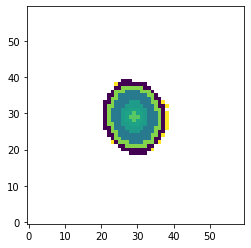

In [2]:
#Read pPXF maps with data

Vrms_map = Image(data_folder+'/Data/Annealing_Bin03/Full/Vrms_Map_Full.fits', ext=1)
erro_rms_map = Image(data_folder+'/Data/Annealing_Bin03/Full/Vrms_Map_Full.fits', ext=2)


Vrms_map.plot()

In [3]:
# To compute the elliptical radius we need that x-axis coincident with the galaxy major axis.
# So we need to rotate the pixel position
def rotate_points(x, y, ang):
    """
    Rotates points conter-clockwise by an angle ANG in degrees.
    Michele cappellari, Paranal, 10 November 2013

    """
    theta = np.radians(ang)
    xNew = x*np.cos(theta) - y*np.sin(theta)
    yNew = x*np.sin(theta) + y*np.cos(theta)

    return xNew, yNew  

In [4]:
x_rot = []   #x original position
y_rot = []   #y original position

vrms = [] #list for Vrms
erms = [] #list for error rms

x0, y0 = (29, 29)
pa     = 11.9
eps    = 0.182

In [5]:
for i in range(Vrms_map.shape[0]):
    for j in range(Vrms_map.shape[1]):
        
        if not np.isnan( Vrms_map.data.data[i,j] ):
            rot_x, rot_y = rotate_points(j - x0, i - y0, 90-pa)
            x_rot.append(rot_x)
            y_rot.append(rot_y)
            
            vrms.append(Vrms_map.data.data[i,j])
            erms.append(erro_rms_map.data.data[i,j])
            

In [6]:
#Transform list in arrays
x = np.array(x_rot)
y = np.array(y_rot)
vrms = np.array(vrms)
erms = np.array(erms)

In [7]:
#Save in a txt

np.savetxt("Vrms_map_Full_rot.txt", np.column_stack([x, y, vrms, erms]),
            header="x[px] \t\t y[px] \t\t Vrms[kms⁻¹] \t\t Erms[kms⁻¹]",
            fmt="%.15e %.15e %.15e %.15e")

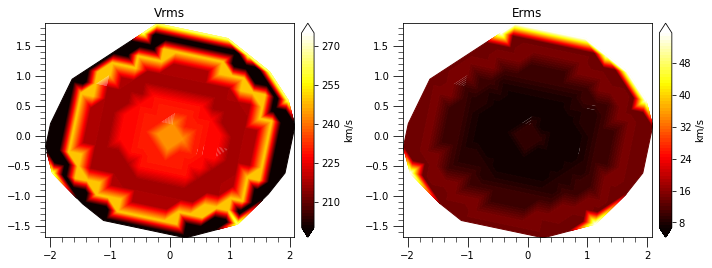

In [8]:
#Plot original data
plt.figure(figsize=(10,8))

plt.subplot(121)
plt.title(r"Vrms")
plot_velfield(x*0.2, y*0.2, vrms,  vmin=200,vmax=275, colorbar=True, label='km/s', cmap=plt.cm.hot, nodots=True)

plt.subplot(122)
plt.title(r"Erms")
plot_velfield(x*0.2, y*0.2, erms,  vmin=erms.min(), vmax=erms.max()+0.5, colorbar=True, label='km/s', cmap=plt.cm.hot, nodots=True)

plt.tight_layout()



In [9]:
from scipy.interpolate import interp2d
import scipy.interpolate
from scipy import ndimage

xi, yi = np.linspace(0.2*x.min(), 0.2*x.max(), 300), np.linspace(0.2*y.min(), 0.2*y.max(), 300)
xi, yi = np.meshgrid(xi, yi)
rbf = scipy.interpolate.Rbf(0.2*x, 0.2*y, vrms, function='gaussian')
zi = rbf(xi, yi)


Text(0.5, 0.98, 'SDP81 Velocity RMS Map')

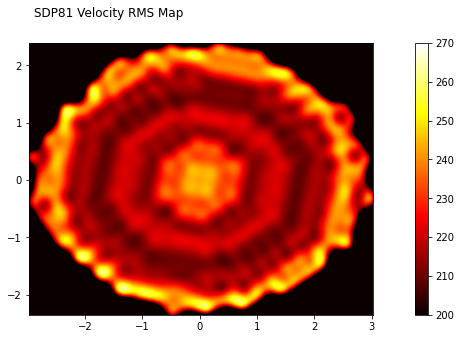

In [9]:
fig = plt.figure(figsize=(15,5))




plt.imshow(zi, vmin=200, vmax=270, origin='lower',
           extent=[0.2*x.min(), 0.2*x.max(), 0.2*y.min(), 0.2*y.max()], cmap=plt.cm.hot)
plt.colorbar()
fig.suptitle('SDP81 Velocity RMS Map')